<a href="https://colab.research.google.com/github/sobiyeo/iExcel/blob/main/StageB_Regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
train= pd.read_csv('train.csv')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import skew
#from scipy.special import boxcoxlp
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import matplotlib.style as style
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
train.shape

(1460, 81)

In [ ]:
pd.set_option('display.max_columns', 48)


# Checking for Missing values

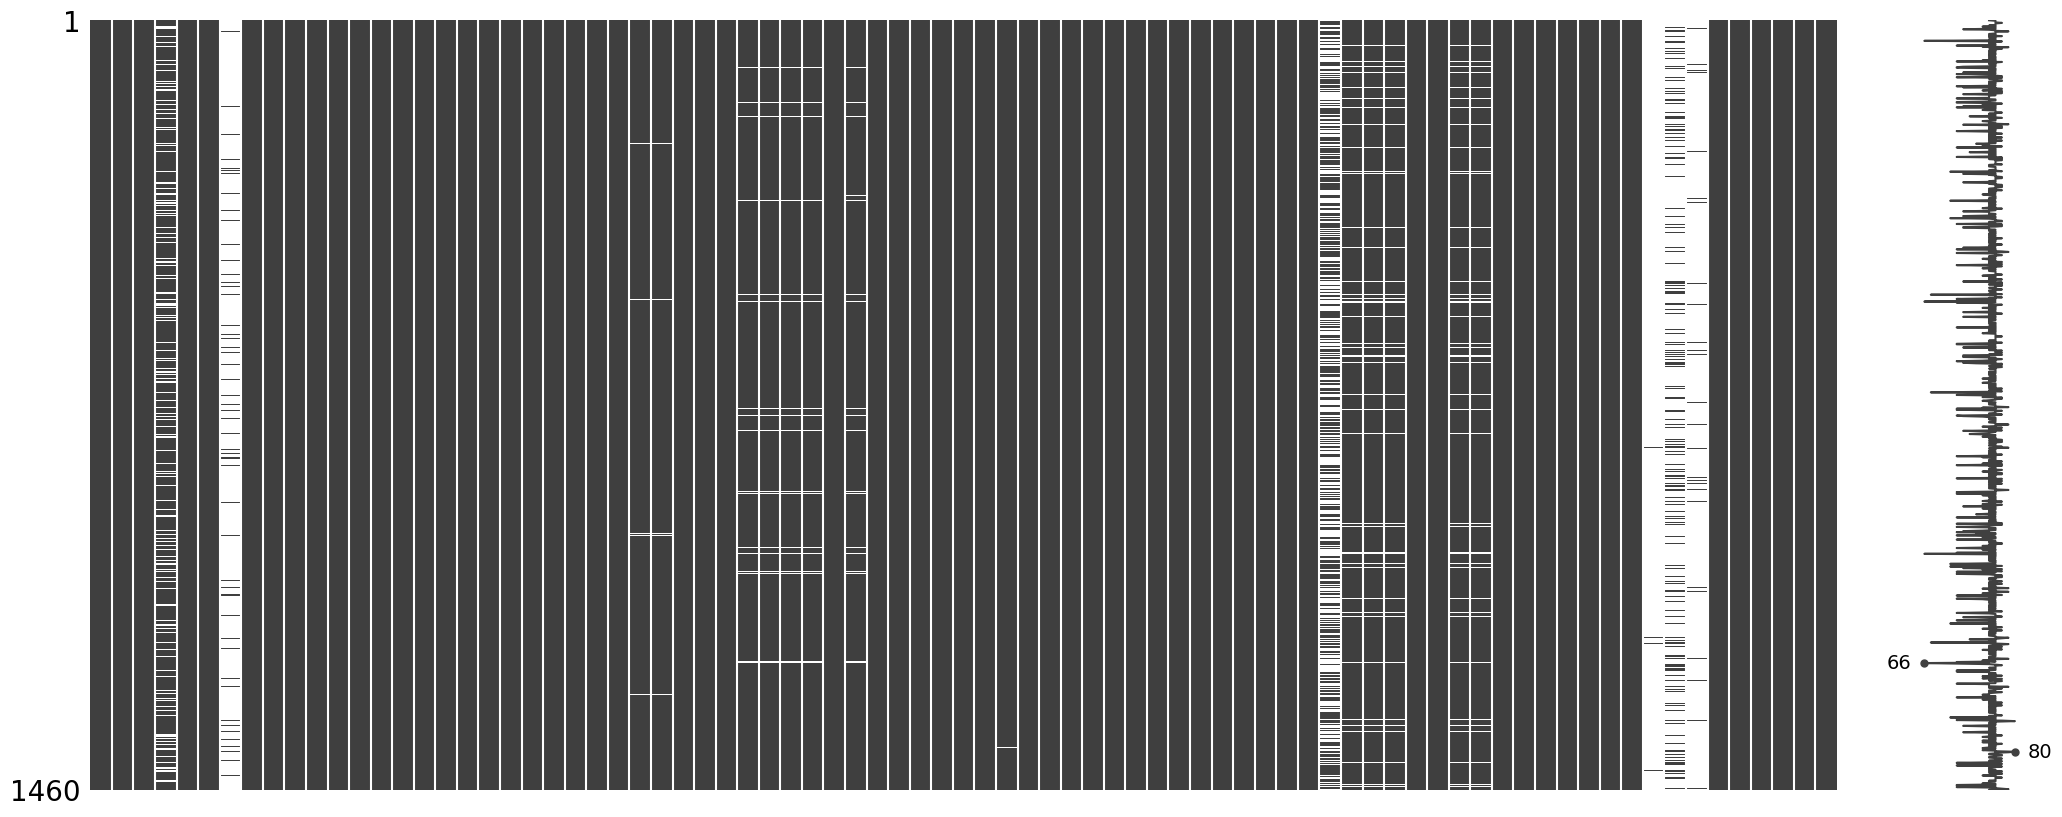

In [ ]:
msno.matrix(train);

In [ ]:
def missing_percent(df):
  total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
  percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
  return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [ ]:
missing_percent(train)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


In [ ]:
from scipy import stats

In [ ]:
def plotting_3_chart(df, feature):
  import seaborn as sns
  import matplotlib.pyplot as plt
  import matplotlib.gridspec as gridspec
  import matplotlib.style as style
  style.use('fivethirtyeight')



In [ ]:
#creating a customised chart and giving in figsize
fig = plt.figure(layout = 'constrained', figsize = (12,8))

<Figure size 1200x800 with 0 Axes>

In [ ]:
#creating a grid of 3 cols and 3 rows
grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

In [ ]:
#Customising the histogram grid
ax1= fig.add_subplot(grid[0, :2])

#set the title
ax1.set_title('Hsitogram')

#plot the histogram
sns.histplot(data=train, x='SalePrice', kde=True, ax=ax1, stat='probability')

<Axes: title={'center': 'Hsitogram'}, xlabel='SalePrice', ylabel='Probability'>

In [ ]:
#Customising the QQ_plot
ax2 = fig.add_subplot(grid[1:, :2])
#set the title
ax2.set_title('QQ_Plot')
#plotting the QQ-plot
stats.probplot(train.loc[:, 'SalePrice'], plot = ax2)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519414, 180921.19589041095, 0.9319665641512983))

In [ ]:
#Customising the Box Plot
ax3= fig.add_subplot(grid[:, 2])
ax3.set_title('Box Plot')
sns.boxplot(df.loc[:feature], orient='v', ax=ax3)

plotting_3_chart(train, 'SalePrice')

NameError: ignored

In [ ]:
#skewness and kurtosis
print('Skewness:' + str(train['SalePrice'].skew()))
print('Kurtosis:'+ str (train['SalePrice'].kurt()))

Skewness:1.8828757597682129
Kurtosis:6.536281860064529


In [ ]:
#getting the correlation of all the variable with the features with target varible
(train.corr())['SalePrice'].sort_values(ascending = False)[1:]

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [ ]:
(train.corr()**2)['SalePrice'].sort_values(ascending = False)[1:]


OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.123763
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
Id               0.000480
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePrice, dtype: float64

# Sales price VS OverallQual

In [ ]:
def custom_scatplot(y,x):
  #sizing the plot
  style.use('fivethirtyeight')
  plt.subplots(figsize = (12,8))
  #plotting target variable with predictor variable (OveralQual)
  sns.scatterplot(y = y, x = x);

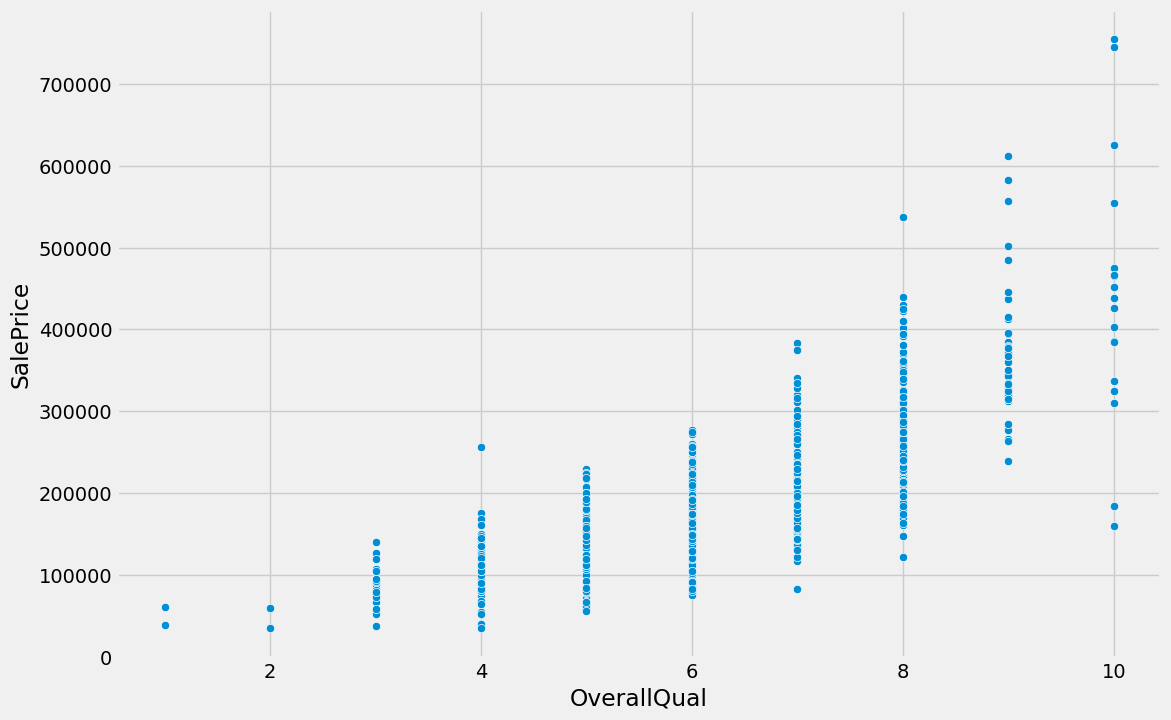

In [ ]:
custom_scatplot(train.SalePrice,train.OverallQual)

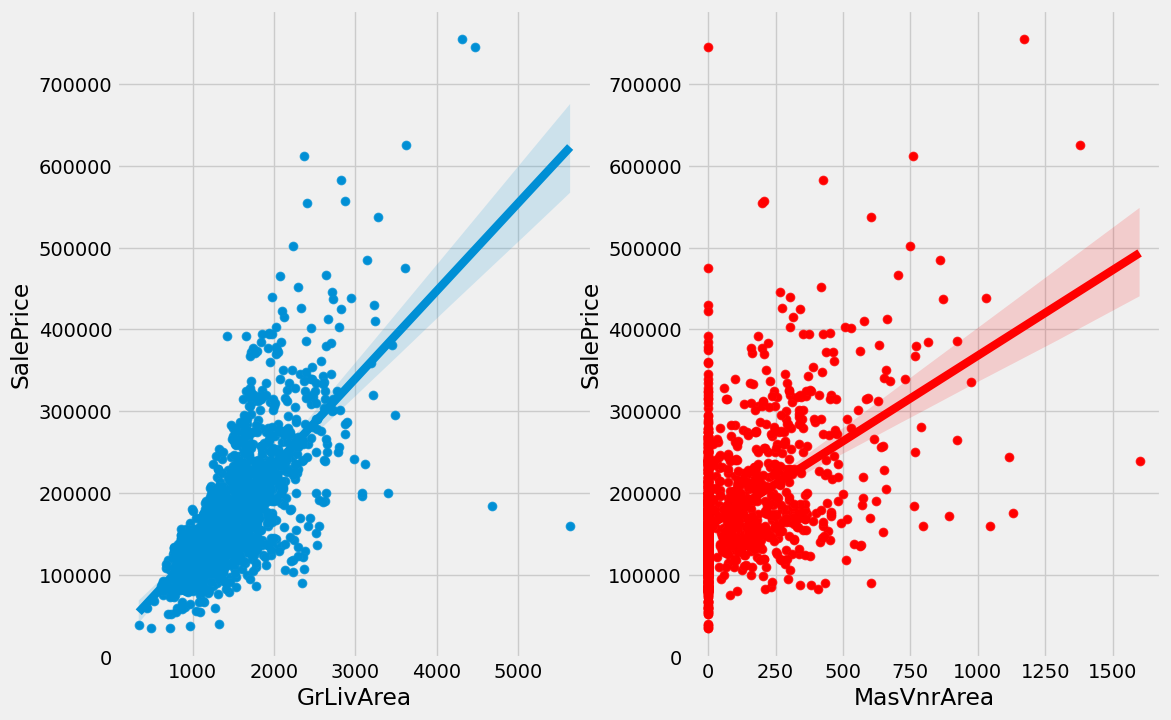

In [ ]:
# Plot sizing
fig, (ax1, ax2)= plt.subplots(figsize =(12,8), ncols=2, sharey=False)
#scatter plottig for SalesPrice and GrLivArea
sns.scatterplot(x = train.GrLivArea, y= train.SalePrice, ax=ax1)
#putting the regression line
sns.regplot(x=train.GrLivArea, y=train.SalePrice, ax=ax1)

#scatter plot for SalePrice and MasVnrArea
sns.scatterplot(x = train.MasVnrArea,y = train.SalePrice, ax=ax2, color='red')
#regressio n line for MasvnrArea and SalePrice
sns.regplot(x=train.MasVnrArea, y=train.SalePrice, ax=ax2, color='red');

#HOMOSCEDACITY

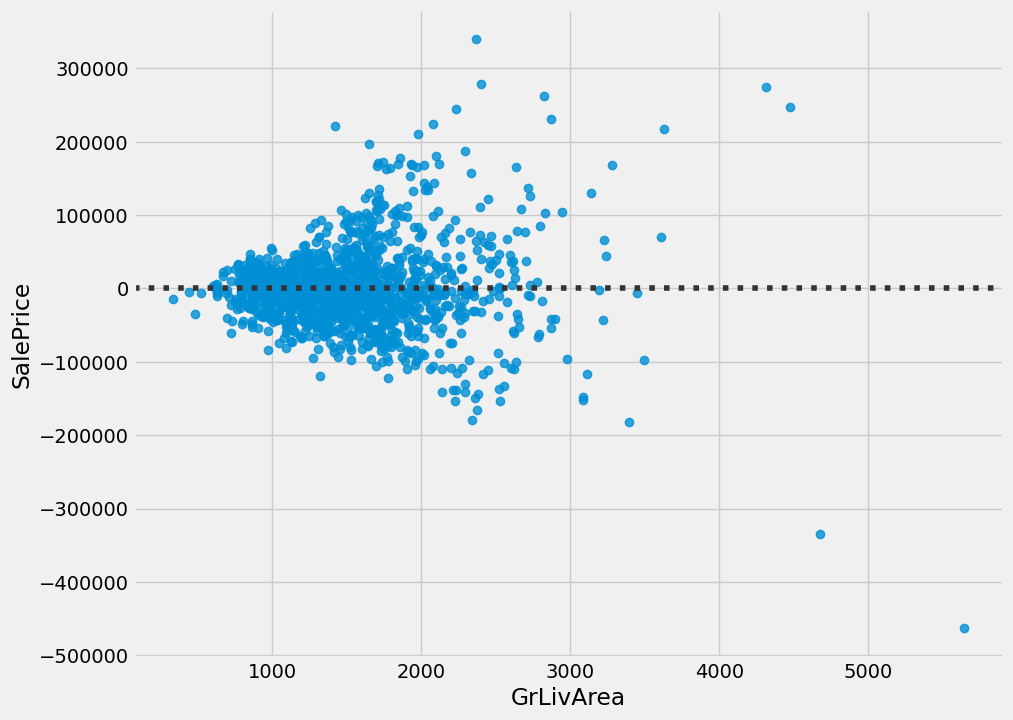

In [ ]:
plt.subplots(figsize=(10,8))
sns.residplot(data=train, x='GrLivArea', y='SalePrice');

#Correcting the Abnormaties and applying a log transformation

In [ ]:
train['SalePrice']=np.log1p(train['SalePrice'])

#Multicolinearity

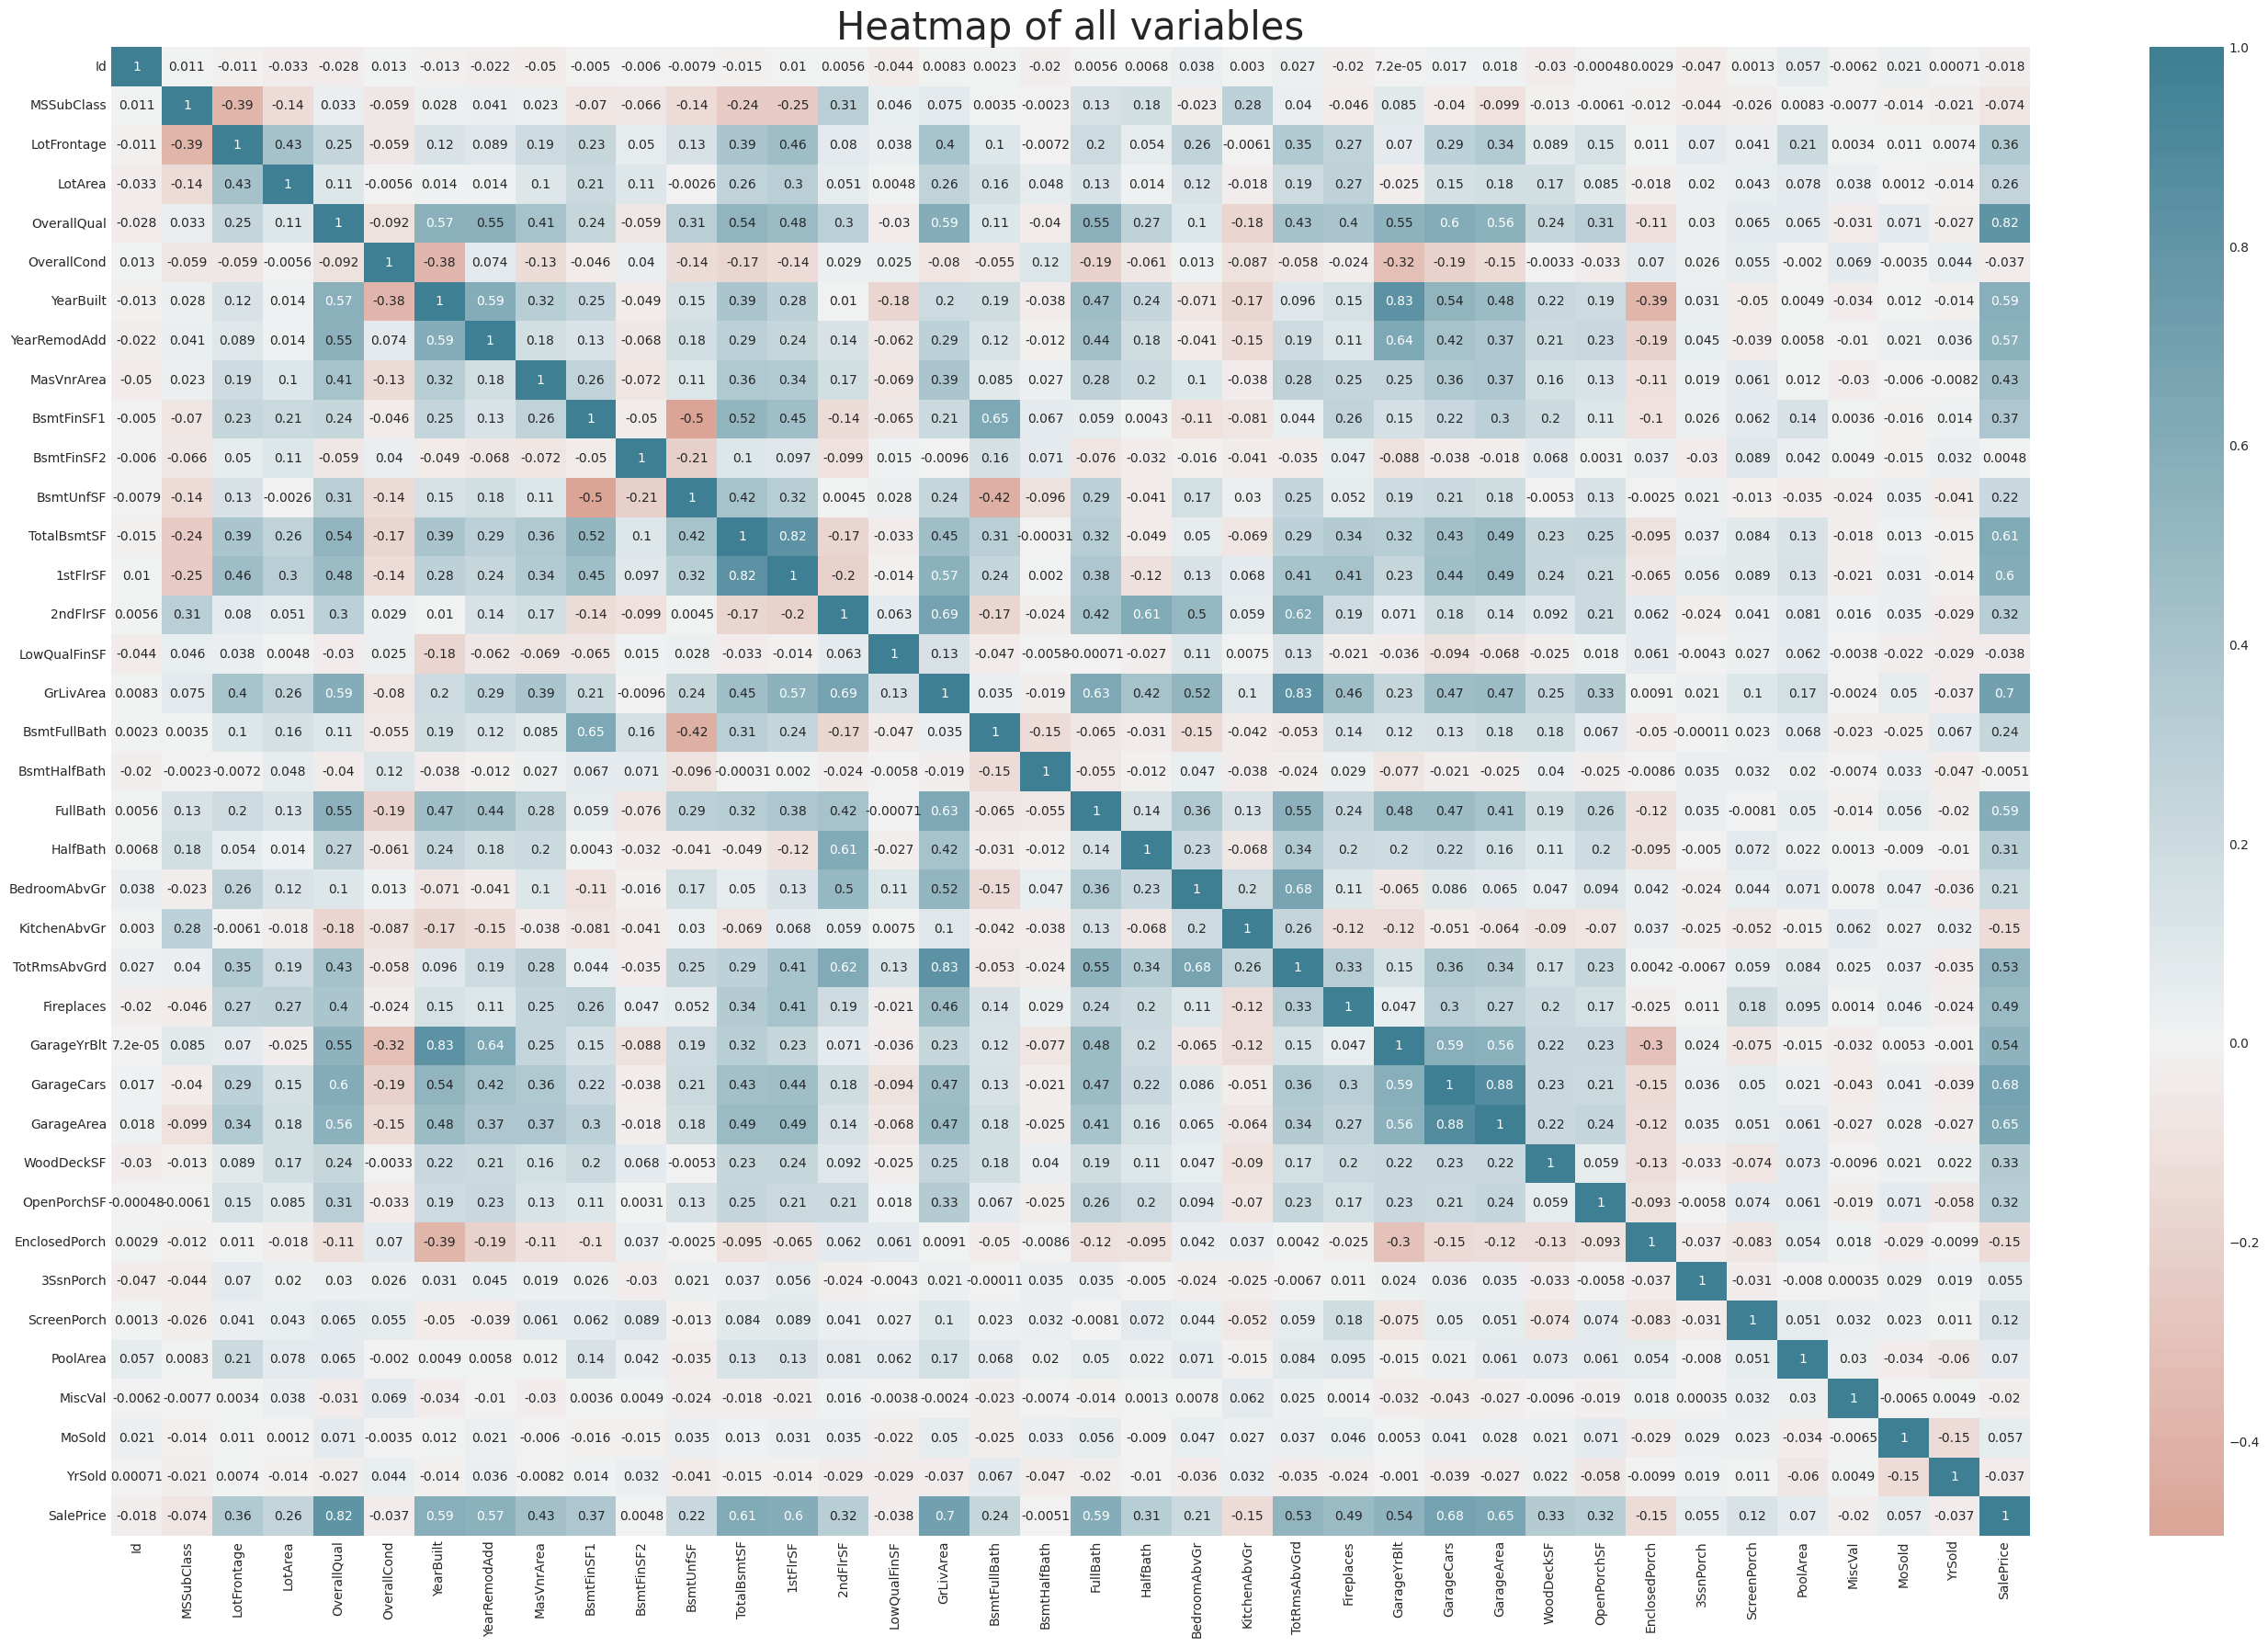

In [ ]:
#plot fig sizing
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))

#plotting heat map
#generzte a mask for the upper triangle (taken from seaborn example gallery)
mask= np.zeros_like(train.corr(), dtype=np.bool)
#mask[np.triu_indices_from[mask]]= True

sns.heatmap(train.corr(),
            cmap=sns.diverging_palette(20,220, n=200),
            mask = mask,
            annot =True,
            center=0,
);

#give title
plt.title('Heatmap of all variables', fontsize = 30);

#FEATURE ENGINEERING

In [ ]:
#dropping the Id from train and test set
train.drop(columns=['Id'], axis=1, inplace= True )
#saving the target values in "y_train"

y=train['SalePrice']

#gettimg a copy of train
old_train = train.copy()

In [ ]:
train.groupby('MSSubClass')['MSZoning'].count()

MSSubClass
20     536
30      69
40       4
45      12
50     144
60     299
70      60
75      16
80      58
85      20
90      52
120     87
160     63
180     10
190     30
Name: MSZoning, dtype: int64

#Conversion to categorical values

In [ ]:
#Zoning class are given in numerical; therefore converted to categorical variables
train['MSSubClass']= train ['MSSubClass'].astype(str)
train['MSZoning']= train.groupby('MSSubClass')['MSZoning'].transform(lambda x:x.fillna(x.mode()[0]))

#How to fill null for categorical data

In [24]:
train['Functional'] = train['Functional'].fillna('Typ')
train['Utilities'] = train ['Utilities'].fillna('AlPub')
train['Exterior1st'] = train['Exterior1st'].fillna(train['Exterior1st'].mode()[0])

In [25]:
missing_percent(train)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


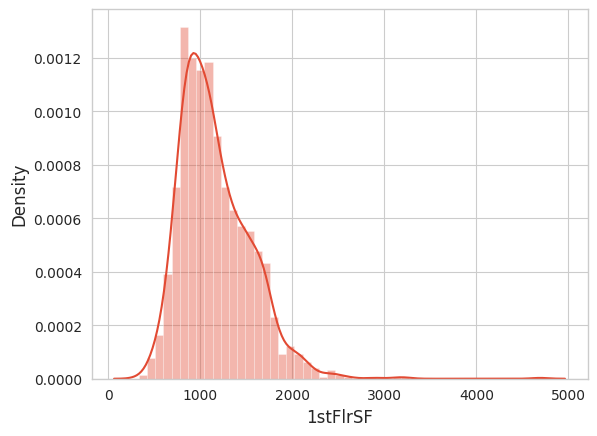

In [27]:
sns.distplot(train['1stFlrSF']);

In [30]:
#Fixing skewed features
def fixing_skewness(df):
  from scipy.stats import skew
  #from scipy.stats import boxcoxlp
  #from scipy.stats import boxcox_normax
  #getting all the data that are not of 'object type'
  numeric_feats = df.dtypes[df.dtypes !='object'].index

  #check the skew of all numerical features
  skewed_feats = df[numeric_feats].apply(lambda x: skew (x)).sort_values(ascending=False)
  high_skew = skewed_feats[abs(skewed_feats)>0.5]
  skewed_features = high_skew.index

  for feat in skewed_features:
    df[feat] = np.log1p(df[feat])

fixing_skewness(train)


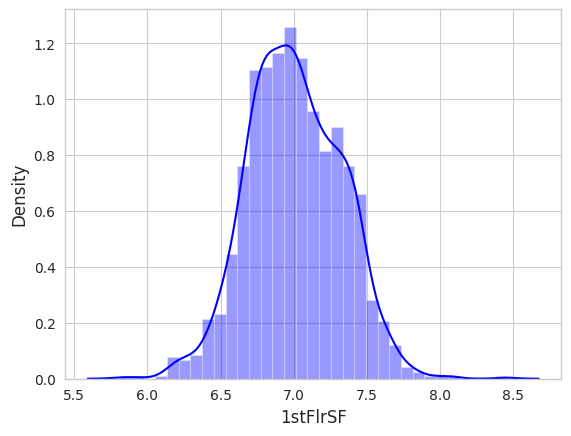

In [33]:
sns.distplot(train['1stFlrSF'], color='blue');